!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!pip install wordcloud

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [2]:
df_yanolja = pd.read_csv('야놀자한스펠.csv')
yanolja=df_yanolja.drop('review_space',axis=1)
yanolja=yanolja.drop('Unnamed: 0',axis=1)
yanolja = yanolja.loc[yanolja.star>0]

In [3]:
yanolja.describe()

,star,length
count,122572.000000,122572.000000
mean,4.631849,29.783156
std,0.754155,45.722463
min,1.000000,1.000000
25%,4.000000,7.000000
50%,5.000000,14.000000
75%,5.000000,32.000000
max,5.000000,499.000000


In [5]:
uhttae = pd.read_csv('여기어때전처리.csv')
uhttae['star_yanolja'] = round(uhttae['star']/2).astype(int)
uhttae.star_yanolja.loc[uhttae.star_yanolja == 0]=1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
uhttae

,hotel,star,review,date,real_date,length,review_spell_check,site,star_yanolja
0,신라스테이 역삼,8.0,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,20시간 전,2022. 04. 15,195,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,1,4
1,신라스테이 역삼,10.0,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,10일 전,2022. 04. 05,180,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,1,5
2,신라스테이 역삼,10.0,깔끔하고 고급스러웠습니다 가격대비 만족했던곳이라 넘넘 만족스러웠어요 로비도 깔끔하고...,12일 전,2022. 04. 03,194,깔끔하고 고급스러웠습니다 가격 대비 만족했던 곳이라 넘넘 만족스러웠어요 로비도 깔끔...,1,5
3,신라스테이 역삼,10.0,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,24일 전,2022. 03. 22,201,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,1,5
4,신라스테이 역삼,10.0,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,24일 전,2022. 03. 22,49,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,1,5
...,...,...,...,...,...,...,...,...,...
114873,뜨랑블루 호텔,4.3,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1,2
114874,뜨랑블루 호텔,10.0,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,5
114875,뜨랑블루 호텔,10.0,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,5
114876,뜨랑블루 호텔,10.0,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1,5


In [6]:
uhttae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114878 entries, 0 to 114877
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel               114878 non-null  object 
 1   star                114878 non-null  float64
 2   review              114878 non-null  object 
 3   date                114878 non-null  object 
 4   real_date           114878 non-null  object 
 5   length              114878 non-null  int64  
 6   review_spell_check  114878 non-null  object 
 7   site                114878 non-null  int64  
 8   star_yanolja        114878 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 7.4+ MB


In [7]:
uhttae.describe()

,star,length,site,star_yanolja
count,114878.000000,114878.000000,114878.0,114878.000000
mean,9.267304,87.085926,1.0,4.639687
std,1.455522,91.000944,0.0,0.734517
min,1.000000,1.000000,1.0,1.000000
25%,9.000000,18.000000,1.0,4.000000
50%,10.000000,44.000000,1.0,5.000000
75%,10.000000,145.000000,1.0,5.000000
max,10.000000,500.000000,1.0,5.000000


In [9]:
uhttae['star']=uhttae['star_yanolja']

In [10]:
uhttae = uhttae.drop('star_yanolja',axis=1)

In [11]:
yanolja['site']=0

In [48]:
uhttae['site']=1

In [12]:
uhttae

,hotel,star,review,date,real_date,length,review_spell_check,site
0,신라스테이 역삼,4,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,20시간 전,2022. 04. 15,195,출장으로 역삼 근처 호텔 찾아보다가 신라스테이 근처에 센터필드도 있고 밥집 카페도 ...,1
1,신라스테이 역삼,5,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,10일 전,2022. 04. 05,180,잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬디으잘쉬잘쉬디으잘쉬디으...,1
2,신라스테이 역삼,5,깔끔하고 고급스러웠습니다 가격대비 만족했던곳이라 넘넘 만족스러웠어요 로비도 깔끔하고...,12일 전,2022. 04. 03,194,깔끔하고 고급스러웠습니다 가격 대비 만족했던 곳이라 넘넘 만족스러웠어요 로비도 깔끔...,1
3,신라스테이 역삼,5,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,24일 전,2022. 03. 22,201,직원분들 너무 친절하십니다 안내데스크가 넓어서 잠시 쉬기에도 편합니다 편의점이 바로...,1
4,신라스테이 역삼,5,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,24일 전,2022. 03. 22,49,깔끔하고 서울에서 갑자기 일이 있거나 놀게 되었을 때 가장 합리적인 선택이라고 생각합니다,1
...,...,...,...,...,...,...,...,...
114873,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1
114874,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1
114875,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1
114876,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1


In [13]:
yanolja

,hotel,star,review,date,real_date,length,review_spell_check,site
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0
...,...,...,...,...,...,...,...,...
122573,그랜드 하얏트 서울,4,친절하시고 조식도 맛있었어요하지만 방음이많이 안되더라구요,1시간 전,2022. 04. 04,31,친절하시고 조식도 맛있었어요 하지만 방음이 많이 안되더라고요,0
122574,그랜드 하얏트 서울,5,역시 5성급 하얏트답습니다 조식 포함시 좀 비싸긴 한데 조식빼고 생각하면 매우 괜찮...,1시간 전,2022. 04. 04,89,역시 5성급 하얏트 답습니다 조식 포함 시 좀 비싸긴 한데 조식 빼고 생각하면 매우...,0
122575,그랜드 하얏트 서울,5,완전 좋았습니디,6시간 전,2022. 04. 04,8,완전 좋았습니디,0
122576,그랜드 하얏트 서울,5,깔끔하고 좋았어용,1일 전,2022. 04. 03,9,깔끔하고 좋았어요,0


In [16]:
df = pd.concat([yanolja, uhttae]) 

In [17]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0
...,...,...,...,...,...,...,...,...
114873,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1
114874,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1
114875,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1
114876,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1


# 합친 데이터 저장

In [18]:
df.to_csv("최종합친호텔리뷰.csv",index=False)

In [2]:
df= pd.read_csv("합친호텔리뷰.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237450 entries, 0 to 114877
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   hotel               237450 non-null  object
 1   star                237450 non-null  int64 
 2   review              237450 non-null  object
 3   date                237450 non-null  object
 4   real_date           237450 non-null  object
 5   length              237450 non-null  int64 
 6   review_spell_check  237450 non-null  object
 7   site                237450 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 16.3+ MB


In [4]:
df.describe()

,star,length,site
count,266473.000000,266473.000000,266473.000000
mean,4.628082,63.053319,0.540021
std,0.754286,95.389737,0.498397
min,1.000000,0.000000,0.000000
25%,4.000000,11.000000,0.000000
50%,5.000000,24.000000,1.000000
75%,5.000000,72.000000,1.000000
max,5.000000,6340.000000,1.000000


In [21]:
df.hotel.describe()

count       237450
unique         303
top       신라스테이 구로
freq          9261
Name: hotel, dtype: object

In [20]:
df.hotel.value_counts()

신라스테이 구로          9261
글래드 마포            7245
신라스테이 마포          6651
노보텔 앰배서더 서울 용산    5513
롯데시티호텔 명동         5138
                  ... 
메이원호텔                4
사월 호텔                3
마리호텔                 2
종로 호텔팝 리즈 프리미어       1
유에이치 스위트 더 서울        1
Name: hotel, Length: 303, dtype: int64

In [22]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 존재하지 않습니다


In [8]:
df = df.dropna()

In [23]:
val_count = df['star'].value_counts() # 유니크값의 개수를 확인합니다.
val_count

5    177447
4     42599
3     11020
2      3658
1      2726
Name: star, dtype: int64

In [24]:
import matplotlib.pyplot as plt # 그래프 그리기 위한 패키지
%matplotlib inline
plt.style.use("ggplot")

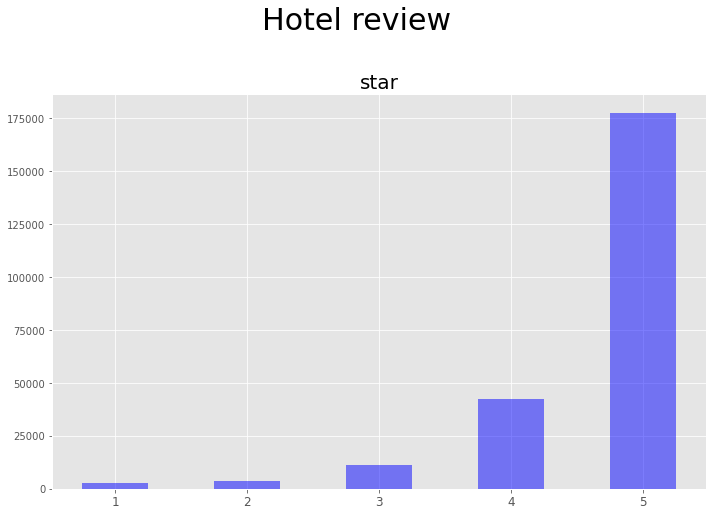

In [25]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = df['star']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Hotel review", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('star', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# 감성분석 (긍부정 나누기)

In [26]:
bad = df.loc[df.star<=3]

In [27]:
bad['label'] = 0

<ipython-input-27-04ed5c8ffe1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['label'] = 0


In [28]:
bad

,hotel,star,review,date,real_date,length,review_spell_check,site,label
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,0
61,몬드리안 서울 이태원(Mondrian Seoul Itaewon),3,구냥 구렇네요,2022. 02. 28,2022. 02. 28,7,구냥 고렇네요,0,0
90,몬드리안 서울 이태원(Mondrian Seoul Itaewon),3,옆방이랑 같이 자는 느낌 양 옆방이랑 방음 진짜 아예 안되고 객실 내에서는 화장실 ...,2022. 01. 23,2022. 01. 23,57,옆방이랑 같이 자는 느낌 양 옆방이랑 방음 진짜 아예 안되고 객실 내에서는 화장실 ...,0,0
103,몬드리안 서울 이태원(Mondrian Seoul Itaewon),1,정말 가격 5성급에 비해 방도 너무 비좁습니다그리고 방음도 안되서 윗층의 발걸음 소...,2022. 01. 09,2022. 01. 09,125,정말 가격 5성급에 비해 방도 너무 비좁습니다 그리고 방음도 안돼서 위층의 발걸음 ...,0,0
120,몬드리안 서울 이태원(Mondrian Seoul Itaewon),1,비싼돈 내고 미리 예약했더니 당일 예약이 가격이 더 저렴함스페리어룸9층 부터 객실 ...,2021. 12. 28,2021. 12. 28,213,비싼 돈 내고 미리 예약했더니 당일 예약이 가격이 더 저렴함 스페리 어름 9층부터 ...,0,0
...,...,...,...,...,...,...,...,...,...
114712,뜨랑블루 호텔,3,1 외관상 청결함은 문제없음2 suv차량까지는 주차되는데 전화하니 안된다 된다 정확...,3년 전,3년 전,198,1 외관상 청결함은 문제없음 2 suv 차량까지는 주차되는데 전화하니 안된다 된다 ...,1,0
114737,뜨랑블루 호텔,3,창문에서 웃풍이 불어 춥고 새벽 사람들 소리때문에 시끄러웠습니다,3년 전,3년 전,36,창문에서 웃풍이 불어 춥고 새벽 사람들 소리 때문에 시끄러웠습니다,1,0
114743,뜨랑블루 호텔,3,가격대비 괜찮은거 같네요,3년 전,3년 전,13,가격 대비 괜찮은 거 같네요,1,0
114773,뜨랑블루 호텔,3,이번이 두번째 방문인데 손가락만한 바퀴벌레가 나왔어요전화하니까 방 변경해주셔서 옮겼...,3년 전,3년 전,118,이번이 두 번째 방문인데 손가락만 한 바퀴벌레가 나왔어요 전화하니까 방 변경해주셔서...,1,0


In [38]:
bad.length.value_counts()

5      553
6      340
8      333
7      319
11     318
      ... 
455      1
458      1
475      1
481      1
442      1
Name: length, Length: 494, dtype: int64

In [29]:
good = df.loc[df.star==5]

In [30]:
good['label']= 1

<ipython-input-30-8290465e9f27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['label']= 1


In [31]:
good

,hotel,star,review,date,real_date,length,review_spell_check,site,label
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,1
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,1
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0,1
6,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,행복하고 즐거운시간이었습니다,4일 전,2022. 04. 01,15,행복하고 즐거운 시간이었습니다,0,1
7,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,너무 좋았어요 깨끗하고 좋은숙소였어요,4일 전,2022. 04. 01,20,너무 좋았어요 깨끗하고 좋은 숙소였어요,0,1
...,...,...,...,...,...,...,...,...,...
114871,뜨랑블루 호텔,5,방이 깨끗하고 넓고무엇보다 침구가 너무 편안해서숙박하기에 너무 좋은 호텔입니다분위도...,5년 전,5년 전,79,방이 깨끗하고 넓고 무엇보다 침구가 너무 편안해서 숙박하기에 너무 좋은 호텔입니다분...,1,1
114872,뜨랑블루 호텔,5,좋앗음,5년 전,5년 전,3,좋았음,1,1
114874,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,1
114875,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,1


In [39]:
postive = good.sample(17400)

In [19]:
data= pd.concat([postive, bad])

In [20]:
target = data.label
data = data.review_spell_check

In [21]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=777)

In [40]:
bad['length'].describe()

count    17404.000000
mean        91.972937
std        100.765297
min          1.000000
25%         18.000000
50%         52.000000
75%        131.000000
max        500.000000
Name: length, dtype: float64

In [41]:
df['length'].describe()

count    237450.000000
mean         57.506161
std          76.847789
min           1.000000
25%          11.000000
50%          23.000000
75%          66.000000
max         500.000000
Name: length, dtype: float64

In [24]:
df_train = df.review_spell_check.copy()

In [25]:
df_train = df_train.dropna()

In [43]:
word_split = df['review_spell_check'].str.split()
word_split[:5]

0        [발레파킹, 비용이, 있긴, 했지만, 방도, 나름, 괜찮고, 조식도, 맛있었어요]
1                                              [굳굳굳굳굳]
2    [생각보다, 방이, 좁아서, 놀랐어요, 아무래도, 안마의자나, 고급, 블루투스, 스...
3    [오픈하고, 얼마, 안, 돼서, 갔었는데, 깔끔하고, 좋은, 호텔이었습니다, 오픈,...
4                                [객실이, 깨끗하고, 너무, 예뻤어요]
Name: review_spell_check, dtype: object

In [27]:
def df2str(df):
    #전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
      #print(s[i])
      document += s[i]
    return document

def get_noun(text):
    # okt tagger를 이용해 명사 추출
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)

    return noun_list

def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'a고딕13.ttf',    # 한글폰트 경로 설정
        background_color='white',                     # 배경 색깔 정하기
        colormap = 'Dark2',                           # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

In [28]:
document = df2str(df_train) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:20] # 상위 20개 단어 확인

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vect = TfidfVectorizer()

In [37]:
vect.fit_transform(df_train).toarray()

MemoryError: Unable to allocate 365. GiB for an array with shape (264906, 184886) and data type float64

In [34]:
train.shape

NameError: name 'train_x' is not defined

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (17.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and di

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 156228 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

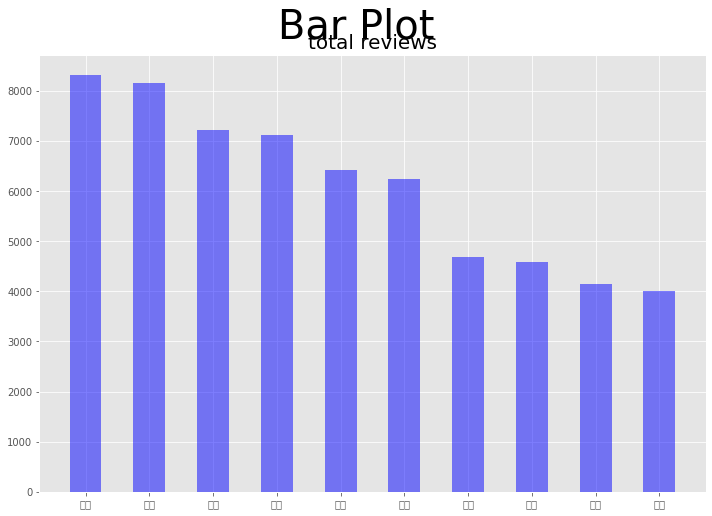

In [ ]:
plt.rc('font', family='NanumBarunGothic')
top_10 = dict(noun_list[:10]) # 추출한 명사 중 상위 10개
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
total_reviews = visualize(noun_list,'total reviews') # 워드클라우드 시각화

OSError: ignored

In [50]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

In [47]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(train.review_space) # countvectorizer 학습
X = vectorizer.transform(train.review_space) # transform

In [42]:
y = train.label

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X,y)

Learning rate set to 0.100582
0:	learn: 1.5583363	total: 2.21s	remaining: 36m 44s
1:	learn: 1.4107678	total: 4.07s	remaining: 33m 48s
2:	learn: 1.3050317	total: 5.89s	remaining: 32m 37s
3:	learn: 1.2245799	total: 7.73s	remaining: 32m 5s
4:	learn: 1.1611031	total: 9.56s	remaining: 31m 43s
5:	learn: 1.1098170	total: 11.4s	remaining: 31m 22s
6:	learn: 1.0669437	total: 13.2s	remaining: 31m 16s
7:	learn: 1.0318838	total: 15.1s	remaining: 31m 6s
8:	learn: 1.0013364	total: 16.9s	remaining: 30m 58s
9:	learn: 0.9760143	total: 18.7s	remaining: 30m 52s
10:	learn: 0.9542687	total: 20.5s	remaining: 30m 47s
11:	learn: 0.9347636	total: 22.4s	remaining: 30m 46s
12:	learn: 0.9184638	total: 24.3s	remaining: 30m 44s
13:	learn: 0.9044327	total: 26.1s	remaining: 30m 40s
14:	learn: 0.8915289	total: 28.1s	remaining: 30m 42s
15:	learn: 0.8796164	total: 29.9s	remaining: 30m 39s
16:	learn: 0.8687167	total: 31.8s	remaining: 30m 38s
17:	learn: 0.8597768	total: 33.7s	remaining: 30m 37s
18:	learn: 0.8519400	total: 

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
y.astype('category')

102896    1
17701     1
91027     1
5705      1
30082     1
         ..
124518    0
124525    0
124530    0
124534    0
124537    0
Name: label, Length: 19472, dtype: category
Categories (2, int64): [0, 1]

In [48]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
#run model
X_pred = vectorizer.transform([input()]) 
y_pred = model.predict(X_pred)
print(y_pred)

NameError: name 'vectorizer' is not defined

In [53]:
test = pd.read_csv("여기어때서초크롤링.csv")

In [57]:
test = test.drop(test.columns[0],axis=1)

In [58]:
test.describe()

,star
count,3607.000000
mean,8.806876
std,1.878675
min,1.000000
25%,8.000000
50%,10.000000
75%,10.000000
max,10.000000


In [59]:
test.loc[test.star==10,'label']=1

In [60]:
test.loc[test.star<4,'label']=0

In [64]:
test = test.dropna()

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 3605
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  2152 non-null   object 
 1   star    2152 non-null   float64
 2   label   2152 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.2+ KB


In [68]:
test.label.astype('category')

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3598    1.0
3599    0.0
3603    1.0
3604    1.0
3605    1.0
Name: label, Length: 2152, dtype: category
Categories (2, float64): [0.0, 1.0]

In [66]:
test1 = test.loc[test.label ==1]

In [67]:
test1

,review,star,label
0,신라스테이 서초 오랜만에 재방문했습니다.위치는 역에서 약간 떨어져있지만 너무 시끄럽...,10.0,1.0
1,"프론트에서 친절하게 대해주셨고, 방에 들어가서 큰침대 사이즈에 놀랐습니다. 전체적으...",10.0,1.0
2,좁지만 깔끔하고 침구류가 좋아요그러나 욕실은 좁아서 불편 ㅠㅠ비지니스호텔이니 이해합니당,10.0,1.0
3,강남에서 숙박할 때마다 매번 이용합니다 한 번도 바깥이나 옆에 소리가 들린 적이 없...,10.0,1.0
4,여러번 방문했는데 이번이 제일 좋았네요방 컨디션은 큰 차이 없는데 고층 배정 받았더...,10.0,1.0
...,...,...,...
3597,침구가 너무 푹신하고 일하시는 사람들이 전부 너무 친절합니다,10.0,1.0
3598,깔끔 조식......,10.0,1.0
3603,오픈한지 얼마 안되서 재빨리 예약해서 다녀왔습니다. 깔끔하고무지 마음에 들었어요. ...,10.0,1.0
3604,새 건물이라서 깨끗하고 좋았음,10.0,1.0


In [88]:
test

,review,star,label
0,신라스테이 서초 오랜만에 재방문했습니다.위치는 역에서 약간 떨어져있지만 너무 시끄럽...,10.0,1.0
1,"프론트에서 친절하게 대해주셨고, 방에 들어가서 큰침대 사이즈에 놀랐습니다. 전체적으...",10.0,1.0
2,좁지만 깔끔하고 침구류가 좋아요그러나 욕실은 좁아서 불편 ㅠㅠ비지니스호텔이니 이해합니당,10.0,1.0
3,강남에서 숙박할 때마다 매번 이용합니다 한 번도 바깥이나 옆에 소리가 들린 적이 없...,10.0,1.0
4,여러번 방문했는데 이번이 제일 좋았네요방 컨디션은 큰 차이 없는데 고층 배정 받았더...,10.0,1.0
...,...,...,...
3598,깔끔 조식......,10.0,1.0
3599,연박하는사람이 없었을까요?첫날 발렛 만원 둘째날 부터 오천원이라고 명시해놓고출차할때...,2.3,0.0
3603,오픈한지 얼마 안되서 재빨리 예약해서 다녀왔습니다. 깔끔하고무지 마음에 들었어요. ...,10.0,1.0
3604,새 건물이라서 깨끗하고 좋았음,10.0,1.0


In [93]:
x_test1 = test.review

In [94]:
y_test1 = test.label

In [95]:
#run model
X_pred = vectorizer.transform(x_test1) 
y_pred = model.predict(X_pred)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [97]:
model.score(X, y)

0.9209120788824979

In [96]:
model.score(X_pred, y_test1)

0.7950743494423792

In [45]:
from gensim.models import Word2Vec

In [47]:
model = Word2Vec(sentences=word_split, window=5)

In [ ]:
model.wv.most_similar("숙소")

[('직원친절도', 0.8483961224555969),
 ('시설과', 0.8474849462509155),
 ('가격', 0.8395146727561951),
 ('전망', 0.8383740186691284),
 ('면에서는', 0.8351473808288574),
 ('숙소임', 0.8311982154846191),
 ('교통', 0.8289322853088379),
 ('뷰', 0.828328013420105),
 ('편의성', 0.8215277194976807),
 ('호텔입니다', 0.8213593363761902)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 2667
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hotel               2643 non-null   object
 1   star                2643 non-null   int64 
 2   review              2643 non-null   object
 3   date                2643 non-null   object
 4   real_date           2643 non-null   object
 5   length              2643 non-null   int64 
 6   review_spell_check  2643 non-null   object
dtypes: int64(2), object(5)
memory usage: 165.2+ KB
